In [2]:
# Importing necessary libraries for image loading, manipulation, visualization, and data handling
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import transforms
from PIL import Image

In [7]:
# Loading the images from a specific directory (train set for the city 'aachen')
# 'images' will store the list of all image file paths
path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\train\aachen\*.png"
images = glob(path)

In [33]:
# Define paths to your datasets
train_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\train"
val_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\val"
test_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\test"

In [8]:
print(images)

['C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000000_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000001_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000002_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000003_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000004_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvaltest\\leftImg8bit\\train\\aachen\\aachen_000005_000019_leftImg8bit.png', 'C:\\Users\\kisho\\OneDrive\\Documents\\infosys internship\\leftImg8bit_trainvalt

In [9]:
# Reading an image to understand its dimensions and number of channels
# 'img.shape' returns height, width, and number of channels for the image
img = cv2.imread(images[0])
height, width, channels = img.shape
print(f"Image Dimensions: {width} x {height}")
print(f"Number of Channels: {channels}")

Image Dimensions: 2048 x 1024
Number of Channels: 3


In [11]:
# Counting the total number of training images across multiple cities in the dataset
cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
total_train_img = 0

# Update the path to the actual location of the dataset
base_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\train"

for city in cities:
    train_images = glob(f'{base_path}\\{city}\\*.png')
    total_train_img += len(train_images)  # Add the number of images found in this city's directory

print(total_train_img)  # Total number of images in the train dataset


2975


In [16]:
# Counting the total number of validation images across different cities
val_cities = ['frankfurt', 'lindau', 'munster']
tot_val_img = 0

# Update the base path to the validation images
base_val_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\val"

for city in val_cities:
    # Look for .png files in the specific city's validation directory
    val_images = glob(f'{base_val_path}\\{city}\\*.png')
    tot_val_img += len(val_images)  # Add the number of images found in this city's directory

print(tot_val_img)  # Total number of images in the validation dataset


500


In [20]:
# List of test cities
test_cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
tot_test_img = 0

# Base path for test images
base_test_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\test"

for city in test_cities:
    # Use f-string for correct path formatting
    test_images = glob(f"{base_test_path}\\{city}\\*.png")
    tot_test_img += len(test_images)  # Count images

print(tot_test_img)  # Total number of images in the test dataset


1525


In [21]:
total = total_train_img + tot_val_img + tot_test_img
print(f'Total Images are {total}')
print(f'Train images are {total_train_img*100/total}%, Validation Images are {tot_val_img*100/total}%, Test Images are {tot_test_img*100/total}%')

Total Images are 5000
Train images are 59.5%, Validation Images are 10.0%, Test Images are 30.5%


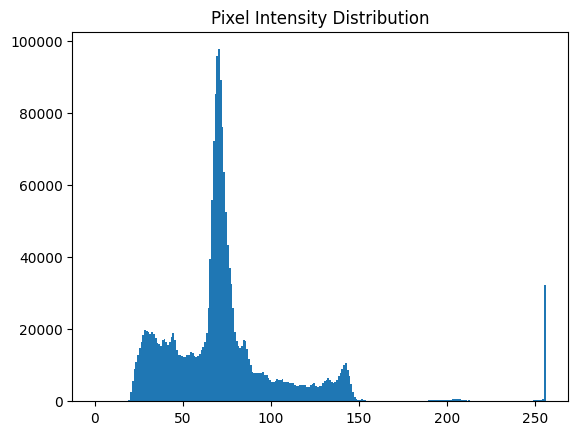

In [39]:
# Pixel Intensity Distribution

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title('Pixel Intensity Distribution')
plt.savefig('pixelintensity')
plt.show()



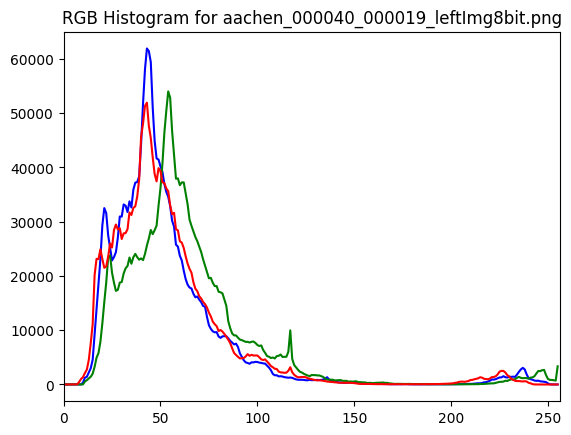

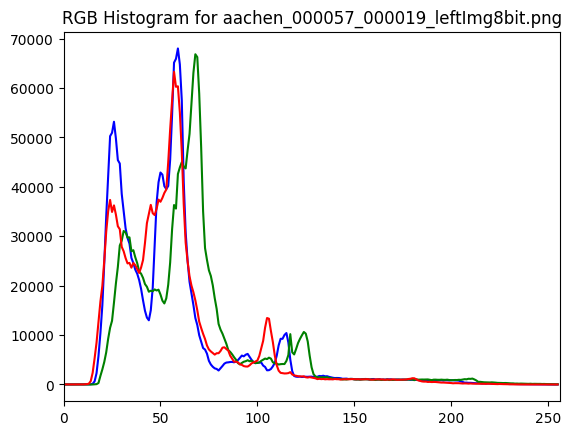

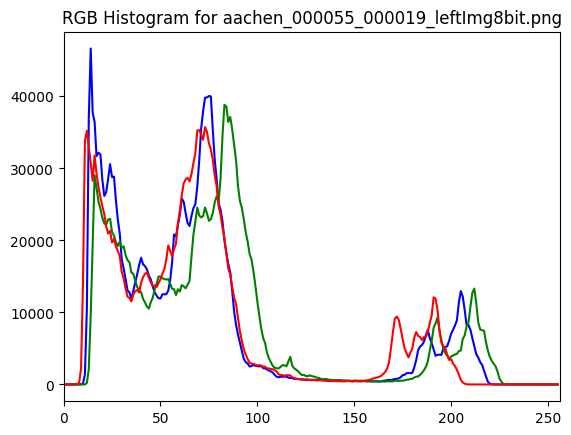

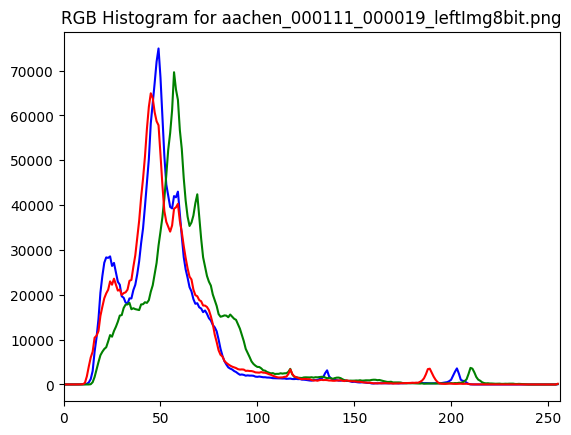

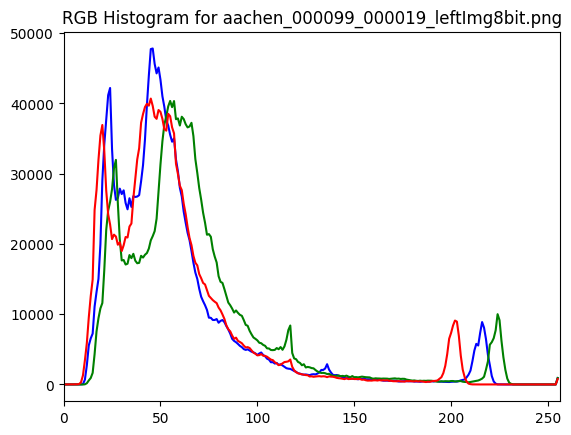

In [38]:
def plot_rgb_histogram(image_dir, num_images=5):
    selected_images = []
    for city in os.listdir(image_dir):
        city_path = os.path.join(image_dir, city)
        images = glob(os.path.join(city_path, '*.png'))
        selected_images.extend(random.sample(images, min(num_images, len(images))))  # Select up to num_images per city

    count = 0  # Counter for iterations
    for img_path in selected_images:
        img = cv2.imread(img_path)
        color = ('b', 'g', 'r')
        for i, col in enumerate(color):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
            plt.xlim([0, 256])
        plt.title(f"RGB Histogram for {os.path.basename(img_path)}")
        plt.savefig('rgbhistogram')

        # Save the plot for each image
        plt.show()
        
        count += 1
        if count >= 5:  # Stop after 5 iterations
            break



# Plot RGB histograms for random training images
plot_rgb_histogram(train_path, num_images=5)



In [39]:
print(f'Aspect ratio is {width/height:.2f}')

Aspect ratio is 2.00


In [25]:
def check_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Corrupted image: {image_path}")
    except Exception as e:
        print(f"Error reading: {image_path}, Exception: {e}")

a = 0
b = 0
c = 0

# Original paths for dataset categories
train_base_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\train"
val_base_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\val"
test_base_path = r"C:\Users\kisho\OneDrive\Documents\infosys internship\leftImg8bit_trainvaltest\leftImg8bit\test"

# Loop through each dataset category
for category in ['train', 'val', 'test']:
    if category == 'train':
        for city in cities:
            im = glob(f"{train_base_path}\\{city}\\*.png")
            for image_path in im:
                check_image(image_path)
                a += 1
    elif category == 'val':
        for city in val_cities:
            im = glob(f"{val_base_path}\\{city}\\*.png")
            for image_path in im:
                check_image(image_path)
                b += 1
    else:
        for city in test_cities:
            im = glob(f"{test_base_path}\\{city}\\*.png")
            for image_path in im:
                check_image(image_path)
                c += 1

# Print the count of images checked in each category
print(a, b, c)


2975 500 1525


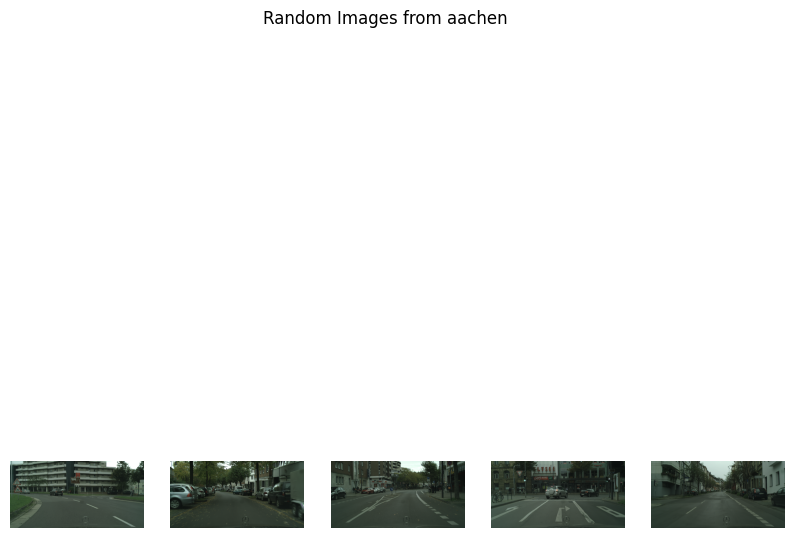

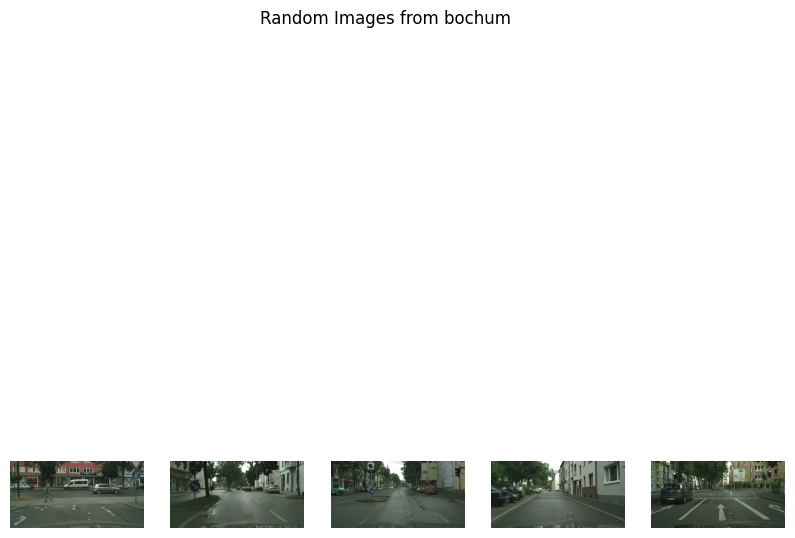

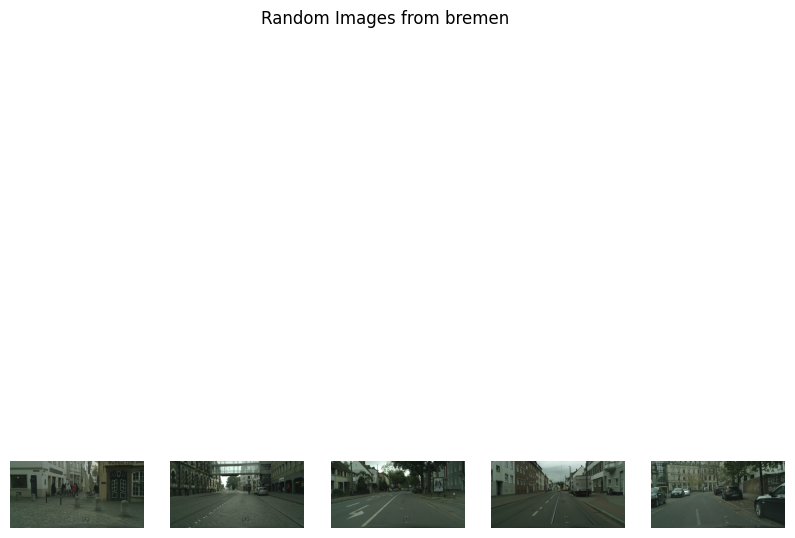

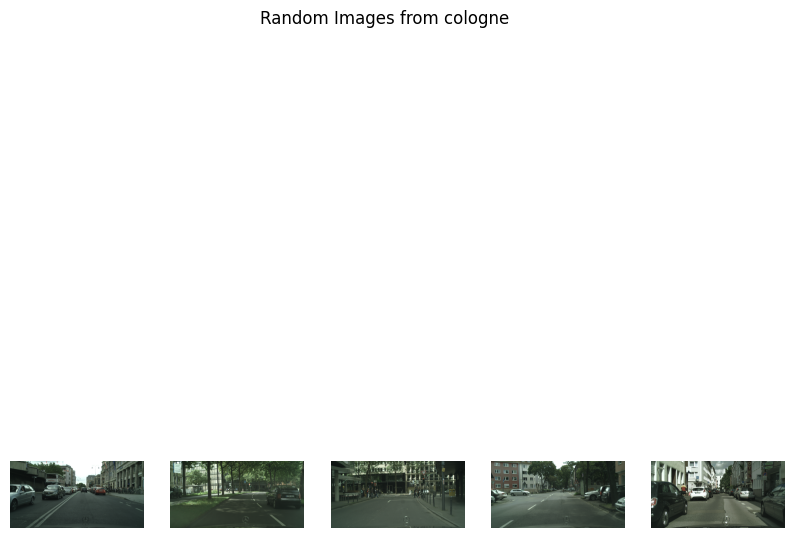

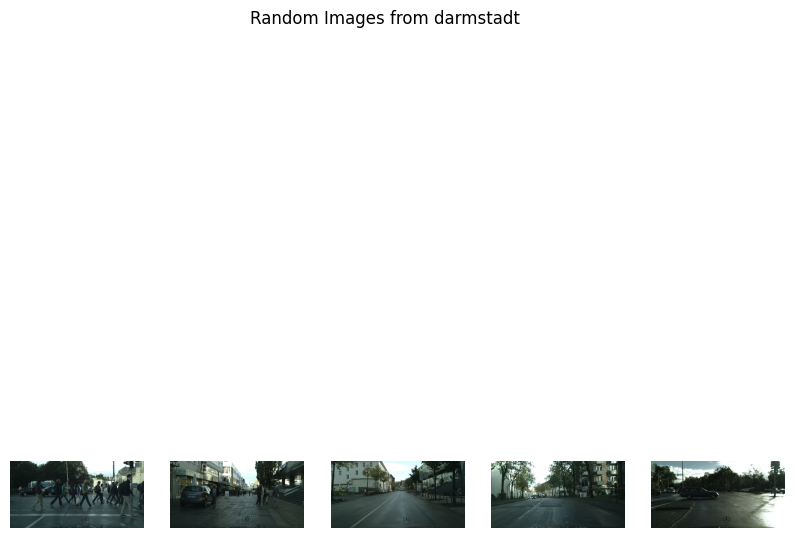

In [35]:


def display_random_images(image_dir, num_images=5):
    count = 0
    for city in os.listdir(image_dir):
        if count == 5 :
            break;
        city_path = os.path.join(image_dir, city)
        images = glob(os.path.join(city_path, '*.png'))
        selected_images = random.sample(images, num_images)
        
        plt.figure(figsize=(10, 10))
        
        for i, img_path in enumerate(selected_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for plotting
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f"Random Images from {city}")
        plt.show()
        count = count+1

# Display random training images
display_random_images(train_path, num_images=5)


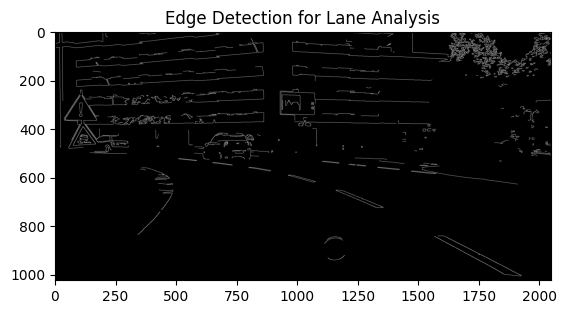

In [37]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection for Lane Analysis')
plt.savefig('edgedetection')

plt.show()


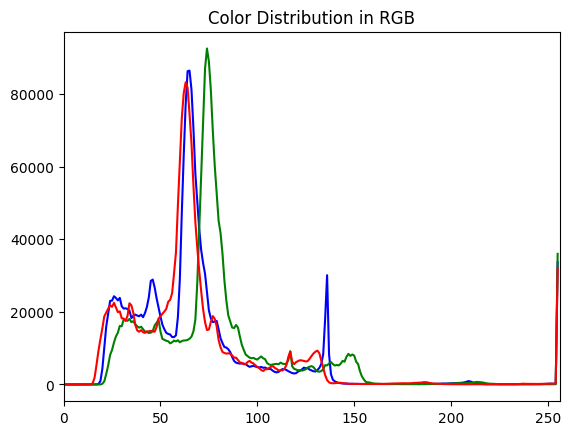

In [52]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([cv2.imread(images[0])], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Distribution in RGB')
plt.show()


In [49]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

blur_score = variance_of_laplacian(gray_image)
print(f"Blurriness Score: {blur_score}")

Blurriness Score: 48.25040710815517


In [54]:
print(type(cv2.imread(images[0])))
print(type(plt.imread(images[0])))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
def resize_image(image_array, size=(512, 256)):
                             
    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)  
    image_resized = cv2.resize(image, size)
    return image_resized


def normalize_image(image):
    return image / 255.0

In [17]:
loaded_image = cv2.imread(images[0])
print(loaded_image)

[[[201 206 172]
  [201 207 174]
  [203 208 176]
  ...
  [ 33  44  33]
  [ 33  44  33]
  [ 33  44  33]]

 [[199 204 172]
  [201 206 173]
  [203 207 174]
  ...
  [ 35  45  34]
  [ 34  45  33]
  [ 34  45  33]]

 [[199 204 173]
  [200 205 174]
  [202 206 173]
  ...
  [ 35  45  33]
  [ 35  45  33]
  [ 34  45  33]]

 ...

 [[ 82  99  83]
  [ 81  98  82]
  [ 82  98  82]
  ...
  [ 62  70  55]
  [ 61  69  53]
  [ 60  68  53]]

 [[ 82  99  83]
  [ 81  98  82]
  [ 82  98  82]
  ...
  [ 64  72  56]
  [ 62  71  55]
  [ 60  69  53]]

 [[ 82  99  83]
  [ 81  98  82]
  [ 82  98  82]
  ...
  [ 64  71  54]
  [ 64  71  55]
  [ 63  70  55]]]


In [19]:
resized = resize_image(loaded_image, size=(512, 256))
print(resized)

[[[174 206 202]
  [177 208 202]
  [176 207 201]
  ...
  [ 39  57  45]
  [ 35  49  37]
  [ 33  45  35]]

 [[175 203 200]
  [177 206 201]
  [174 206 200]
  ...
  [ 29  41  33]
  [ 32  44  35]
  [ 31  51  38]]

 [[172 204 201]
  [176 205 201]
  [174 204 200]
  ...
  [ 27  38  31]
  [ 31  49  42]
  [ 64  88  67]]

 ...

 [[ 84 103  85]
  [ 83 101  82]
  [ 85 102  84]
  ...
  [ 54  71  61]
  [ 55  70  62]
  [ 55  71  63]]

 [[ 82 101  83]
  [ 84 102  85]
  [ 81  99  83]
  ...
  [ 55  71  61]
  [ 52  69  61]
  [ 55  70  63]]

 [[ 82  98  82]
  [ 80  98  80]
  [ 82  98  81]
  ...
  [ 55  71  63]
  [ 55  71  62]
  [ 55  71  62]]]


In [20]:
norm = normalize_image(resized)
print(norm)

[[[0.68235294 0.80784314 0.79215686]
  [0.69411765 0.81568627 0.79215686]
  [0.69019608 0.81176471 0.78823529]
  ...
  [0.15294118 0.22352941 0.17647059]
  [0.1372549  0.19215686 0.14509804]
  [0.12941176 0.17647059 0.1372549 ]]

 [[0.68627451 0.79607843 0.78431373]
  [0.69411765 0.80784314 0.78823529]
  [0.68235294 0.80784314 0.78431373]
  ...
  [0.11372549 0.16078431 0.12941176]
  [0.1254902  0.17254902 0.1372549 ]
  [0.12156863 0.2        0.14901961]]

 [[0.6745098  0.8        0.78823529]
  [0.69019608 0.80392157 0.78823529]
  [0.68235294 0.8        0.78431373]
  ...
  [0.10588235 0.14901961 0.12156863]
  [0.12156863 0.19215686 0.16470588]
  [0.25098039 0.34509804 0.2627451 ]]

 ...

 [[0.32941176 0.40392157 0.33333333]
  [0.3254902  0.39607843 0.32156863]
  [0.33333333 0.4        0.32941176]
  ...
  [0.21176471 0.27843137 0.23921569]
  [0.21568627 0.2745098  0.24313725]
  [0.21568627 0.27843137 0.24705882]]

 [[0.32156863 0.39607843 0.3254902 ]
  [0.32941176 0.4        0.33333333]


In [ ]:
# Displaying a few sample images from the dataset to visualize
sample_imgs = images[:5]  # Select 5 sample images
plt.figure(figsize=(15, 10))
for idx, img_path in enumerate(sample_imgs):
    img = Image.open(img_path)
    plt.subplot(1, 5, idx+1)
    plt.imshow(img)
    plt.title(f'Sample {idx+1}')
    plt.axis('off')
plt.show()

In [ ]:
# Visualizing the distribution of images across different cities in the training set
city_img_counts = []
for city in cities:
    train_images = glob(f'D:\Datasets\leftImg8bit ALL\leftImg8bit\train\{city}\\*.png')
    city_img_counts.append(len(train_images))

# Create a DataFrame for better visualization
df = pd.DataFrame({'City': cities, 'Image Count': city_img_counts})
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Image Count', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Training Images across Cities')
plt.show()